In [95]:
import numpy as np
import kungfu_pandas as kp
import pandas as pd
from matplotlib import pyplot as plt

## Create a new file

We're starting off with creating a new filename. This file will have an `.h5` extension and we'll use this throughout the rest of the notebook.

In [12]:
measurement_name = 'test'
path = r'/Users/gerwinkoolstra/Documents/Code/panda_hero/data'

# Create a new filename
filepath = kp.create_path_filename(measurement_name, path=path)

## Save a 1d array at once

In [31]:
fpoints = np.linspace(1, 9, 101)
mag = np.random.rand(101)
phase = np.random.rand(101)

kp.save_nd_sweep(filepath=filepath, data_array=np.c_[mag, phase], data_column_names=["magnitude", "phase"], 
                 index_arrays=[fpoints], index_names=["fpoints"], 
                 h5_key="vna_spectrum")

h5_key already exists, data not saved!


In [29]:
print(kp.get_keys(filepath))

['2dsweep', 'build2d', 'build3d', 'settings', 'vna_spectrum']


In [30]:
df = kp.open_file(filepath, h5_key="vna_spectrum")
df

,fpoints,magnitude,phase
fpoints,,,
1.00,1.00,0.084020,0.909675
1.08,1.08,0.248821,0.465216
1.16,1.16,0.415380,0.898887
1.24,1.24,0.581689,0.822018
1.32,1.32,0.051340,0.616350
...,...,...,...
8.68,8.68,0.729694,0.377838
8.76,8.76,0.921537,0.436161
8.84,8.84,0.528396,0.466112


## Append to a 1d array

In [33]:
x1 = np.linspace(0, 1, 11)

for X1 in x1:
    fpoints = np.linspace(1, 9, 101)
    mag = np.random.rand(101)
    phase = np.random.rand(101)
        
    kp.append_nd_sweep(filepath, data_array=np.c_[mag, phase], index_arrays=[[X1], fpoints], data_column_names=["magnitude", "phase"], 
                       index_names=["x1", "fpoints"], h5_key="build1dsweep")

h5_key build1dsweep does not exist! These are all available h5_keys:
['2dsweep', 'build2d', 'build3d', 'settings', 'vna_spectrum']


In [35]:
df = kp.open_file(filepath, h5_key="build1dsweep")
df

magnitude     phase
x1  fpoints                     
0.0 1.00      0.395954  0.088981
    1.08      0.030732  0.212687
    1.16      0.015680  0.594282
    1.24      0.460454  0.218475
    1.32      0.580991  0.654628
...                ...       ...
1.0 8.68      0.659944  0.479762
    8.76      0.567475  0.793156
    8.84      0.471219  0.743254
    8.92      0.994015  0.276695
    9.00      0.733724  0.233328

[1111 rows x 2 columns]

## Add a 2d data array at once

In [14]:
x1 = np.linspace(0, 0.5, 21)
x2 = np.linspace(0.5, -0.5, 11)

dummy_data = np.random.rand(len(x1) * len(x2), 3)

kp.save_nd_sweep(filepath=filepath, data_array=dummy_data, data_column_names=["fpoints", "magnitude", "phase"], 
                index_arrays=[x1, x2], index_names=["x1", "x2"], 
                h5_key="2dsweep")

/Users/gerwinkoolstra/opt/anaconda3/envs/eonhe/lib/python3.10/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '2dsweep'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


In [15]:
print(kp.get_keys(filepath))

['2dsweep']


In [16]:
df = kp.open_file(filepath, h5_key="2dsweep")
df

fpoints  magnitude     phase
x1  x2                                 
0.0  0.5  0.539804   0.534638  0.988106
     0.4  0.612307   0.996575  0.042969
     0.3  0.442704   0.799247  0.970814
     0.2  0.362341   0.664080  0.645652
     0.1  0.024418   0.033680  0.417882
...            ...        ...       ...
0.5 -0.1  0.545670   0.109269  0.776292
    -0.2  0.545369   0.063553  0.556822
    -0.3  0.347187   0.115480  0.152937
    -0.4  0.939563   0.062664  0.963128
    -0.5  0.248137   0.998963  0.514901

[231 rows x 3 columns]

## Build a 2d array, data point by data point

This is the simplest 2d sweep, where we save only a single row of data per sweep index. Thus, data is concatenated row by row.

In [17]:
print(kp.get_keys(filepath))

['2dsweep']


In [18]:
# x1 and x2 are imaginary voltage sweep axes
x1 = np.linspace(0, 0.5, 21)
x2 = np.linspace(0.5, -0.5, 11)

for X1 in x1:
    for X2 in x2:
        # Generate some fake data point with 3 quantities, imagine these are the freq, mag, phase from a VNA trace at a single frequency.
        data_array = np.random.rand(3).reshape(-1, 3)
        
        kp.append_nd_sweep(filepath, data_array, index_arrays=[[X1], [X2]], data_column_names=["a", "b", "c"], 
                           index_names=["x1", "x2"], h5_key="build2d")


h5_key build2d does not exist! These are all available h5_keys:
['2dsweep']


In [19]:
df = kp.open_file(filepath, h5_key="build2d")
df

a         b         c
x1  x2                                
0.0  0.5  0.836360  0.940630  0.856000
     0.4  0.282287  0.537046  0.147755
     0.3  0.040774  0.937660  0.308115
     0.2  0.816309  0.401765  0.861167
     0.1  0.824510  0.160133  0.973313
...            ...       ...       ...
0.5 -0.1  0.327972  0.088192  0.460258
    -0.2  0.150239  0.511171  0.868756
    -0.3  0.083405  0.254763  0.090458
    -0.4  0.022200  0.767555  0.113581
    -0.5  0.419437  0.718371  0.739818

[231 rows x 3 columns]

The file now has an extra entry. It left the other two keys untouched.

In [20]:
print(kp.get_keys(filepath))

['2dsweep', 'build2d']


Now, what if the data is multi-dimensional?

In [21]:
# x1 and x2 are imaginary voltage sweep axes
x1 = np.linspace(0, 0.5, 21)
x2 = np.linspace(0.5, -0.5, 11)

# Simulate a sweep over some arrays x1 and x2 (as one would do in experiment)
for X1 in x1:
    for X2 in x2:
        # Generate some fake data point with 3 quantities, imagine these are the freq, mag, phase from a VNA trace at a single frequency.
        data_array = np.random.rand(10, 3)
        
        # Note the extra added index_name called fpoints
        kp.append_nd_sweep(filepath, data_array, index_arrays=[[X1], [X2], range(10)], 
                           data_column_names=["a", "b", "c"], 
                           index_names=["x1", "x2", "fpoints"], 
                           h5_key="build3d")

h5_key build3d does not exist! These are all available h5_keys:
['2dsweep', 'build2d']


In [22]:
kp.open_file(filepath, h5_key="build3d")

a         b         c
x1  x2   fpoints                              
0.0  0.5 0        0.739670  0.422570  0.288645
         1        0.108598  0.452312  0.729118
         2        0.112668  0.193785  0.739251
         3        0.835426  0.288790  0.232218
         4        0.329494  0.183080  0.919802
...                    ...       ...       ...
0.5 -0.5 5        0.897487  0.527722  0.528144
         6        0.776530  0.443348  0.280452
         7        0.550358  0.928959  0.688601
         8        0.379351  0.846562  0.318915
         9        0.731484  0.576821  0.865358

[2310 rows x 3 columns]

In [23]:
print(kp.get_keys(filepath))

['2dsweep', 'build2d', 'build3d']


## Add a settings dictionary to the same file

In [24]:
# Create a dictionary with some settings
settings = {"setting_1" : 3.0, "setting_2" : True, "setting_3" : "another_datatype"}

kp.save_dict(filepath=filepath, data_dict=settings, h5_key="settings")

In [25]:
df = kp.open_file(filepath, h5_key="settings")
df

,setting_1,setting_2,setting_3
0,3.0,True,another_datatype


Now append to the same dictionary

In [26]:
more_settings = {"setting_1" : 1.0, "setting_2" : False, "setting_3" : "test1"}
kp.append_dict(filepath, more_settings, h5_key="settings")

# Check the contents of the new file
df = kp.open_file(filepath, h5_key="settings")
df

,setting_1,setting_2,setting_3
0,3.0,True,another_datatype
1,1.0,False,test1


In [27]:
print(kp.get_keys(filepath))

['2dsweep', 'build2d', 'build3d', 'settings']


## Loading the data

In [37]:
df = kp.open_file(filepath, h5_key="build3d")

In [38]:
df.head()

a         b         c
x1  x2  fpoints                              
0.0 0.5 0        0.739670  0.422570  0.288645
        1        0.108598  0.452312  0.729118
        2        0.112668  0.193785  0.739251
        3        0.835426  0.288790  0.232218
        4        0.329494  0.183080  0.919802

In [74]:
# First get the inner most index
fpts = df.index.get_level_values('fpoints').unique()
x2 = df.index.get_level_values('x2').unique()
x1 = df.index.get_level_values('x1').unique()

In [94]:
df['a'].loc[pd.IndexSlice[0.10:0.11]]

x1   x2    fpoints
0.1   0.5  0          0.130884
           1          0.894054
           2          0.005661
           3          0.857034
           4          0.141796
                        ...   
     -0.5  5          0.132675
           6          0.723169
           7          0.713786
           8          0.718309
           9          0.312907
Name: a, Length: 110, dtype: float64

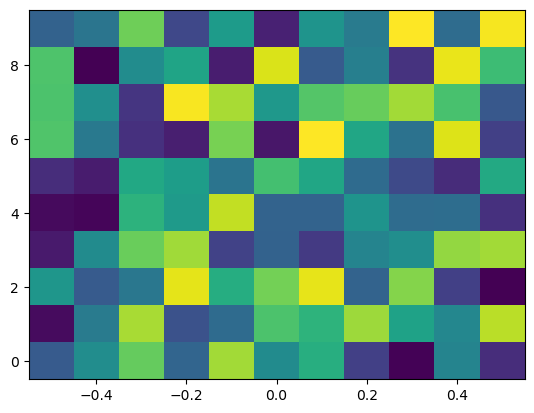

In [100]:
zdata = df['a'].loc[pd.IndexSlice[0.10:0.11]].to_numpy().reshape(len(x2), len(fpts))

plt.pcolormesh(x2, fpts, zdata.T)

# Save data with chunking 

When chunking a file to prevent data acquisition slowdown, you must check the filesize during data saving. Where filesize checking occurs is up to the discretion of the user.

In [ ]:
#Define the measurement name
measurement_name = "chunked_measurement"

#Define where to create the local folder with chunked files
local_path = r"C:\Users\eeroq1\data"

#Define the path where chip information is saved in a yaml file


#Create the local folder where chunked files with be saved
temp_local_dir = kp.create_temp_dir(measurement_name, local_path)

#Generate the first working filepath where data will be saved
filepath = kp.get_working_temp_file(temp_local_dir)

#Define the maximum filesize (left small for purpose of this example)
max_filesize = 1e2

      

Save the data and check filesize

In [ ]:
#Dummy experiment
probe_points1 = np.linspace(0, 1, 10).tolist()
probe_points2 = np.linspace(0.0, 0.5, 5).tolist()

from numpy import random

for k, v_unload in enumerate(probe_points1):

    for j, Vprobe in enumerate(probe_points2):
        
        fpts = np.linspace(4e9, 5e9, 801)
        mag = random.randint(100, size = (len(fpts)))
        phase = random.randint(5, size = (len(fpts)))
        kp.append_nd_sweep(filepath=filepath, data_array=np.c_[fpts, mag, phase], 
                            data_column_names=["fpoints", "mag", "phase"], 
                            index_arrays=[[v_unload], [Vprobe], fpts], index_names=["Unload","Trapguard", "Frequency"], 
                            h5_key="vna_spectrum")
    
        #Check the filesize of the current working filepath
        filepath = kp.check_filesize(filepath, max_filesize)
        

Consolidate all files and save to QNAS

In [ ]:
#Define where in the QNAS you want to save data and 
perm_path = r"/Volumes/EeroQ/Projects/004_Device2.0/data/2024-03-25/chunked_data.h5"

#Consolidate and save all chunked files in temp_local_dir to permanent location
kp.save_permanent(temp_local_dir, perm_path)